In [9]:
import skimage.transform
import numpy as np
from matplotlib import pyplot as plt

In [10]:
def terrangen(imax,smallness,scale,seed=None,maxsize=10**7):
    outsize = 6*scale**(2*(imax-1))
    assert maxsize>outsize, 'Potential Memory error: Size = 6*scale**(2*(imax-1)) = {} is above maxsize = {}'.format(outsize,maxsize)
    if seed is not None:
        np.random.seed(seed=seed)
        
    
    img = np.zeros((2,3))
    A = 1
    J = smallness
    for i in range(imax):
        img += np.random.normal(scale=A*J**i,size=img.shape) #add noise
        if i==imax-1:
            break
        img = skimage.transform.rescale(img,scale,anti_aliasing=False,mode='reflect',multichannel=False)
    return img

def plot(img):
    #simple plotter, uses terrain colour map: https://matplotlib.org/users/colormaps.html
    plt.figure(figsize=(14,12))
    plt.imshow(img,cmap='terrain')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def plotwithbeach():
    img = addbeach(img,vmin=vmin,vmax=vmax)
    plot(img)

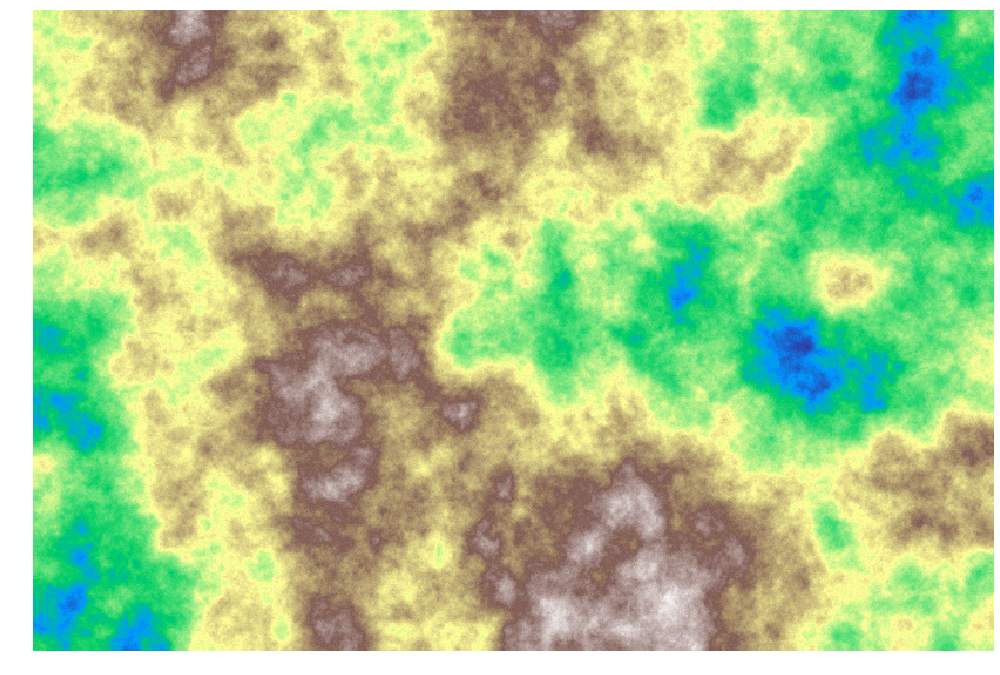

In [11]:
smallness = 0.76 #0.1 -> no small features, 1.0 -> to many small features
imax = 15 #number of itterations
scale = 1.5 #scale factor
seed = 43

img = terrangen(imax,smallness,scale,seed=seed)
plot(img)


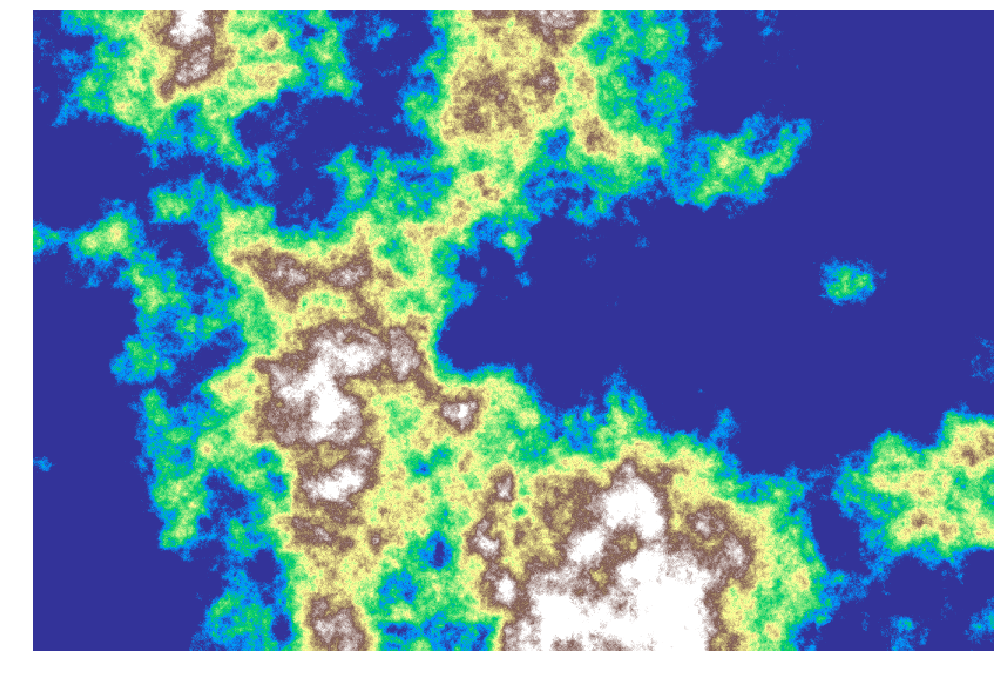

In [12]:
smallness = 0.76 #0.1 -> no small features, 1.0 -> to many small features
imax = 15 #number of itterations
scale = 1.5 #scale factor
seafrac = 0.4
snowfrac = 0.02
seed = 43
def addseasnow(img,seafrac,snowfrac):
    pmin = np.percentile(img,seafrac*100)
    pmax = np.percentile(img,(1-snowfrac)*100)
    img = np.clip(img,pmin,pmax) #make snow and sea
    return img

img = terrangen(imax,smallness,scale,seed=seed)
img = addseasnow(img,seafrac,snowfrac)
plot(img)

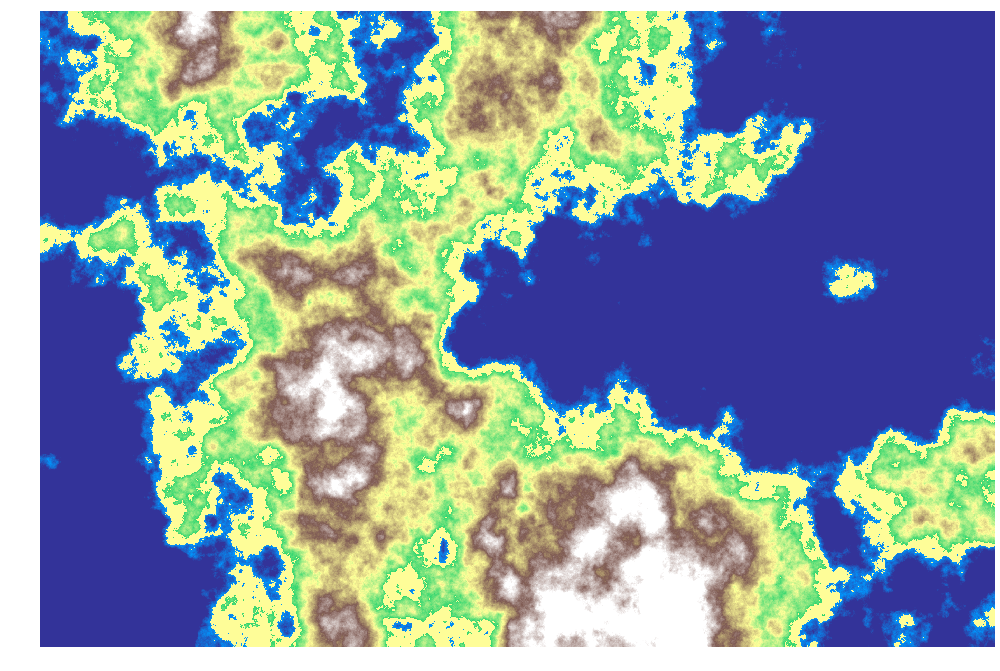

In [13]:
smallness = 0.74 #0.1 -> no small features, 1.0 -> to many small features
imax = 18 #number of itterations
scale = 1.5 #scale factor
seafrac = 0.35
snowfrac = 0.02
seed = 43
def addbeach(img,vmin=0.15,vmax=0.25):
    Amin,Amax = np.min(img),np.max(img)
    img2 = (img-Amin)/(Amax-Amin) #rescale 0<=img2<=1
    img[(img2>vmin)*(img2<vmax)] = (Amax+Amin)/2 #set shoreline
    return img


img = terrangen(imax,smallness,scale,seed=seed)
img = addseasnow(img,seafrac,snowfrac)
img = addbeach(img,vmin=0.15,vmax=0.30)
plot(img)

In [14]:
from ipywidgets import interact

def fullterrain(imax=15,smallness=0.74,scale=1.5,seed=42,seafrac=0.4,snowfrac=0.02):
    img = terrangen(imax,smallness,scale,seed=seed)
    img = addseasnow(img,seafrac,snowfrac)
    img = addbeach(img)
    plot(img)
interact(fullterrain,imax=(5,20,1),smallness=(0.5,1.0,0.01),scale=(1.0,2.0,0.01),seafrac=(0.0,1.0,0.01),snowfrac=(0.0,0.1,0.01))

interactive(children=(IntSlider(value=15, description='imax', max=20, min=5), FloatSlider(value=0.74, descript…

<function __main__.fullterrain(imax=15, smallness=0.74, scale=1.5, seed=42, seafrac=0.4, snowfrac=0.02)>